In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.svm import SVC, LinearSVC
warnings.filterwarnings('ignore')
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.preprocessing import MinMaxScaler,LabelEncoder

### Load dữ liệu

In [143]:
df_train = pd.read_csv(r"C:\Users\Admin\Downloads\train.csv\train.csv")
df_train['Credit_Score'].value_counts()

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

In [3]:
df_train

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [144]:
df_test = pd.read_csv(r"C:\Users\Admin\Downloads\test.csv\test.csv")
df_test

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0x25fe5,CUS_0x8600,December,Sarah McBridec,4975,031-35-0942,Architect,20002.88,1929.906667,10,...,12.0,_,3571.7,34.780553,NaN,Yes,60.964772,146.48632477751087,Low_spent_Small_value_payments,275.53956951573343
49996,0x25fee,CUS_0x942c,September,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4,...,7.0,Good,502.38,27.758522,31 Years and 11 Months,NM,35.104023,181.44299902757518,Low_spent_Small_value_payments,409.39456169535066
49997,0x25fef,CUS_0x942c,October,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,7.0,Good,502.38,36.858542,32 Years and 0 Months,No,35.104023,__10000__,Low_spent_Large_value_payments,349.7263321025098
49998,0x25ff0,CUS_0x942c,November,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4,...,7.0,Good,502.38,39.139840,32 Years and 1 Months,No,35.104023,97.59857973344877,High_spent_Small_value_payments,463.23898098947717


### Join tập train và test cho dễ xử lý

In [145]:
df = pd.concat([df_train, df_test], ignore_index=True)
df.shape

(150000, 28)

In [6]:
df.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                        15000
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       22500
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                17112
Delay_from_due_date             0
Num_of_Delayed_Payment      10500
Changed_Credit_Limit            0
Num_Credit_Inquiries         3000
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age          13500
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      6750
Payment_Behaviour               0
Monthly_Balance              1762
Credit_Score                50000
dtype: int64

### loai bo gia tri nhieu & NaN

In [146]:
object_col = df.describe(include='O').columns
object_col

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Num_of_Loan', 'Type_of_Loan',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_History_Age', 'Payment_of_Min_Amount',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [8]:
for col in object_col:
    print('Column Name: '+col)
    print("**"*20)
    print(df[col].value_counts(dropna=False))
    print('END', "--"*18, '\n')

Column Name: ID
****************************************
ID
0x1602     1
0x162e     1
0x25fea    1
0x25feb    1
0x25fec    1
          ..
0x13afa    1
0x13afb    1
0x13afc    1
0x13afd    1
0x25ff1    1
Name: count, Length: 150000, dtype: int64
END ------------------------------------ 

Column Name: Customer_ID
****************************************
Customer_ID
CUS_0xd40     12
CUS_0x9bf4    12
CUS_0x5ae3    12
CUS_0xbe9a    12
CUS_0x4874    12
              ..
CUS_0x2eb4    12
CUS_0x7863    12
CUS_0x9d89    12
CUS_0xc045    12
CUS_0x942c    12
Name: count, Length: 12500, dtype: int64
END ------------------------------------ 

Column Name: Month
****************************************
Month
January      12500
February     12500
March        12500
April        12500
May          12500
June         12500
July         12500
August       12500
September    12500
October      12500
November     12500
December     12500
Name: count, dtype: int64
END ------------------------------------ 



### Loại bỏ các giá trị đặc biệt

In [147]:
def text_cleaning(data):
    if data is np.NaN or not isinstance(data, str):
        return data
    else:
        return str(data).strip('_ ,"')

In [148]:
df = df.applymap(text_cleaning).replace(['', 'nan', '!@9#%8', '#F%$D@*&8'], np.NaN)
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,0x25fe5,CUS_0x8600,December,Sarah McBridec,4975,031-35-0942,Architect,20002.88,1929.906667,10,...,NaN,3571.7,34.780553,NaN,Yes,60.964772,146.48632477751087,Low_spent_Small_value_payments,275.53956951573343,NaN
149996,0x25fee,CUS_0x942c,September,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4,...,Good,502.38,27.758522,31 Years and 11 Months,NM,35.104023,181.44299902757518,Low_spent_Small_value_payments,409.39456169535066,NaN
149997,0x25fef,CUS_0x942c,October,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,36.858542,32 Years and 0 Months,No,35.104023,10000,Low_spent_Large_value_payments,349.7263321025098,NaN
149998,0x25ff0,CUS_0x942c,November,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4,...,Good,502.38,39.139840,32 Years and 1 Months,No,35.104023,97.59857973344877,High_spent_Small_value_payments,463.23898098947717,NaN


In [11]:
df.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                        15000
Age                             0
SSN                          8400
Occupation                  10500
Annual_Income                   0
Monthly_Inhand_Salary       22500
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                17112
Delay_from_due_date             0
Num_of_Delayed_Payment      10500
Changed_Credit_Limit         3150
Num_Credit_Inquiries         3000
Credit_Mix                  30000
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age          13500
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      6750
Payment_Behaviour           11400
Monthly_Balance              1762
Credit_Score                50000
dtype: int64

In [11]:
df.select_dtypes(include='O').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   ID                       150000 non-null  object
 1   Customer_ID              150000 non-null  object
 2   Month                    150000 non-null  object
 3   Name                     135000 non-null  object
 4   Age                      150000 non-null  object
 5   SSN                      141600 non-null  object
 6   Occupation               139500 non-null  object
 7   Annual_Income            150000 non-null  object
 8   Num_of_Loan              150000 non-null  object
 9   Type_of_Loan             132888 non-null  object
 10  Num_of_Delayed_Payment   139500 non-null  object
 11  Changed_Credit_Limit     146850 non-null  object
 12  Credit_Mix               120000 non-null  object
 13  Outstanding_Debt         150000 non-null  object
 14  Credit_History_Age  

### Thay đổi kiểu dữ liệu cho các cột phù hợp

In [149]:
df['ID'] = df.ID.apply(lambda x: int(x, 16))
df['Customer_ID']= df.Customer_ID.apply(lambda x: int(x[4:], 16))
df['Month'] = pd.to_datetime(df.Month, format='%B').dt.month
df['Age']= df.Age.astype(int) 
df['SSN']= df.SSN.apply(lambda x: x if x is np.NaN else int(str(x).replace('-', ''))).astype(float)
df['Age'] = df.Age.astype(int)
df['Annual_Income'] = df.Annual_Income.astype(float)
df['Num_of_Loan'] =df.Num_of_Loan.astype(int)
df['Num_of_Delayed_Payment'] = df.Num_of_Delayed_Payment.astype(float)
df['Changed_Credit_Limit'] = df.Changed_Credit_Limit.astype(float)
df['Outstanding_Debt'] = df.Outstanding_Debt.astype(float)
df['Amount_invested_monthly'] = df.Amount_invested_monthly.astype(float)
df['Monthly_Balance'] = df.Monthly_Balance.astype(float)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        150000 non-null  int64  
 1   Customer_ID               150000 non-null  int64  
 2   Month                     150000 non-null  int32  
 3   Name                      135000 non-null  object 
 4   Age                       150000 non-null  int32  
 5   SSN                       141600 non-null  float64
 6   Occupation                139500 non-null  object 
 7   Annual_Income             150000 non-null  float64
 8   Monthly_Inhand_Salary     127500 non-null  float64
 9   Num_Bank_Accounts         150000 non-null  int64  
 10  Num_Credit_Card           150000 non-null  int64  
 11  Interest_Rate             150000 non-null  int64  
 12  Num_of_Loan               150000 non-null  int32  
 13  Type_of_Loan              132888 non-null  o

### chuyển đổi thời gian thàng tháng

In [150]:
def Month_Converter(x):
    if pd.notnull(x):
        num1 = int(x.split(' ')[0])
        num2 = int(x.split(' ')[3])
      
        return (num1*12)+num2
    else:
        return x
    
df['Credit_History_Age'] = df.Credit_History_Age.apply(lambda x: Month_Converter(x)).astype(float)
df['Type_of_Loan'] = df['Type_of_Loan'].apply(lambda x: x.lower().replace('and ', '').replace(', ', ',').strip() if pd.notna(x) else x)

In [151]:
df['Name'].value_counts(dropna=False).head()

Name
NaN         15000
Stevex         66
Langep         65
Jessicad       59
Johnc          58
Name: count, dtype: int64

In [16]:
df.dropna(ignore_index = True).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33705 entries, 0 to 33704
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        33705 non-null  int64  
 1   Customer_ID               33705 non-null  int64  
 2   Month                     33705 non-null  int32  
 3   Name                      33705 non-null  object 
 4   Age                       33705 non-null  int32  
 5   SSN                       33705 non-null  float64
 6   Occupation                33705 non-null  object 
 7   Annual_Income             33705 non-null  float64
 8   Monthly_Inhand_Salary     33705 non-null  float64
 9   Num_Bank_Accounts         33705 non-null  int64  
 10  Num_Credit_Card           33705 non-null  int64  
 11  Interest_Rate             33705 non-null  int64  
 12  Num_of_Loan               33705 non-null  int32  
 13  Type_of_Loan              33705 non-null  object 
 14  Delay_

### Không nên bỏ NaN vì sẽ làm dataset mất cân bằng

In [152]:
object_col = df.select_dtypes(include='O').columns
object_col

Index(['Name', 'Occupation', 'Type_of_Loan', 'Credit_Mix',
       'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score'],
      dtype='object')

### Xử lý các outlier và fill các cột số thiếu

In [153]:
nec_object_col = ['Occupation','Type_of_Loan','Credit_Mix','Payment_Behaviour']
df['Credit_Score'].unique()

array(['Good', 'Standard', 'Poor', nan], dtype=object)

In [154]:
def get_iqr_lower_upper(df, columns, multiply=1.5):
        for col in columns:
                q1 = df[col].quantile(0.25)
                q3 = df[col].quantile(0.75)
                qir = q3 - q1
                
                lower_bound = q1 - 1.5 * qir
                upper_bound = q3 + 1.5 * qir
                
                meann = df[col].mean()
                
                df[col] = df[col].apply(lambda x: meann if x < lower_bound or x > upper_bound else x)
    
        return df

    

In [155]:
numeric_col = df.select_dtypes(include='number').columns
numeric_col=numeric_col.to_list()

In [156]:
df_copy = df.copy()
df_copy = df_copy.reset_index(inplace=False,drop =True)

In [180]:
df_copy = get_iqr_lower_upper(df_copy,numeric_col)


In [169]:
numeric_col.pop(0)

'ID'

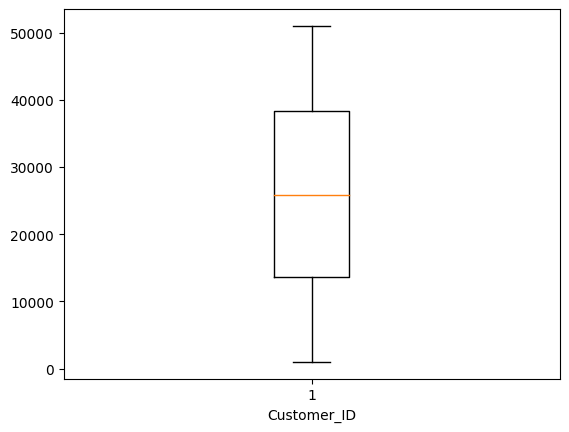

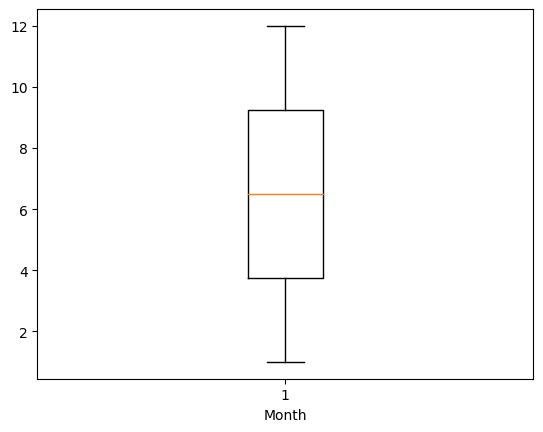

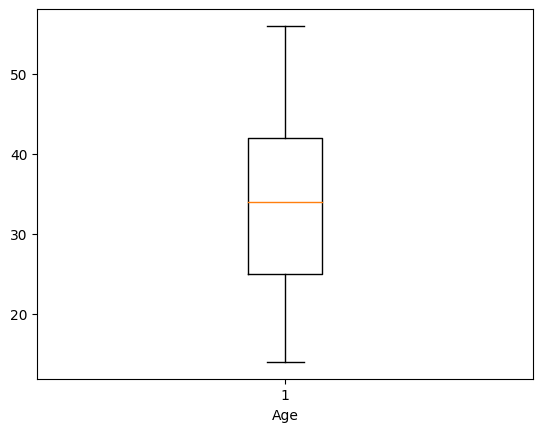

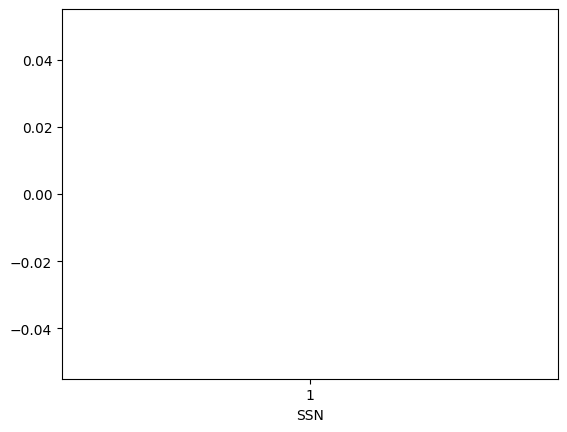

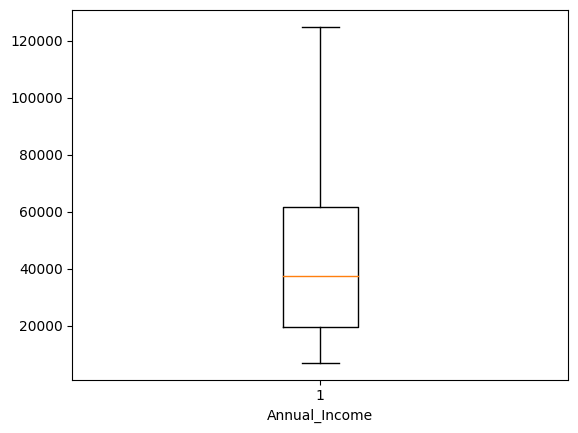

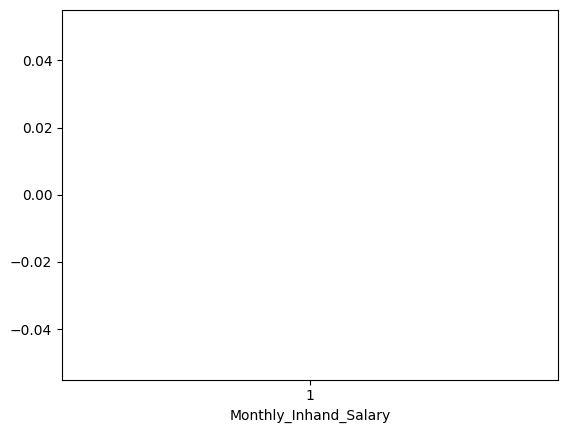

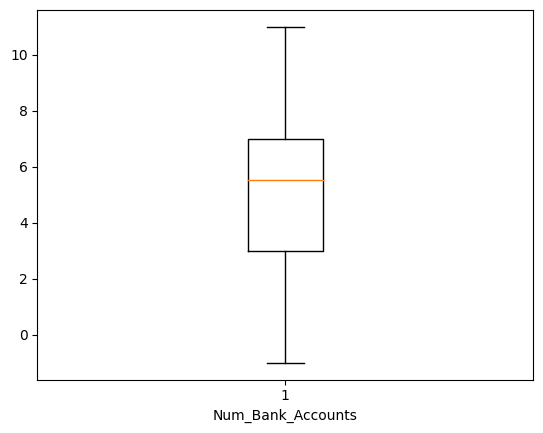

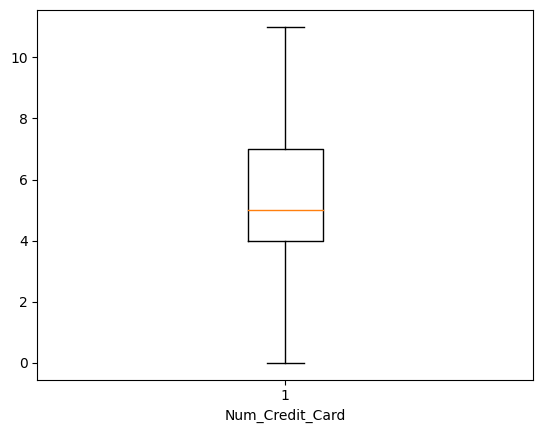

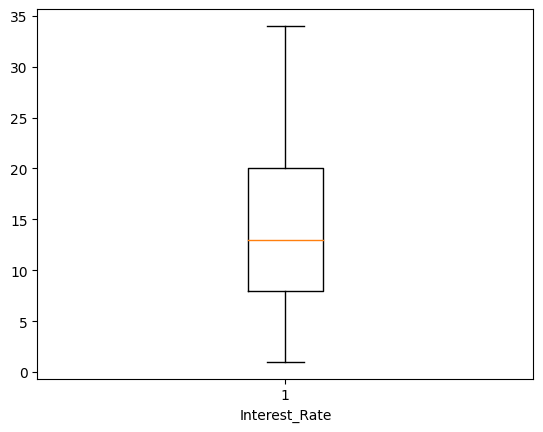

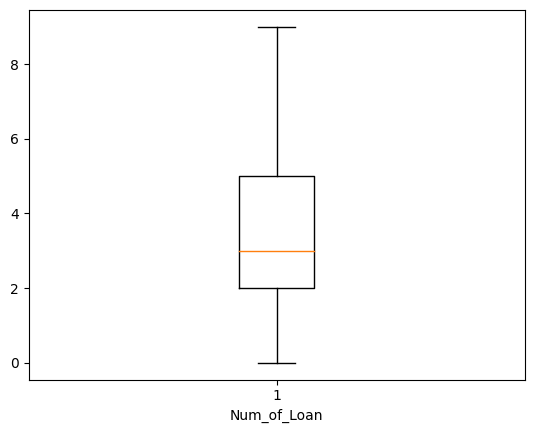

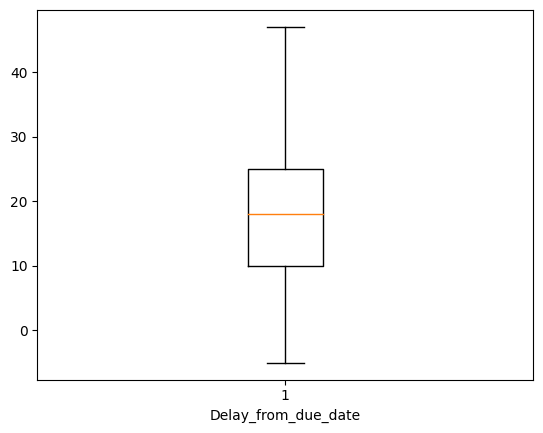

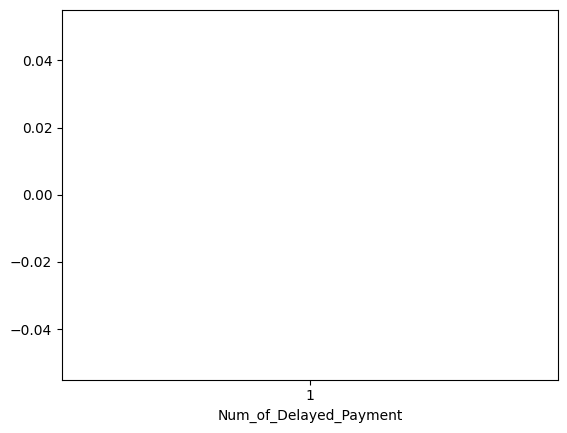

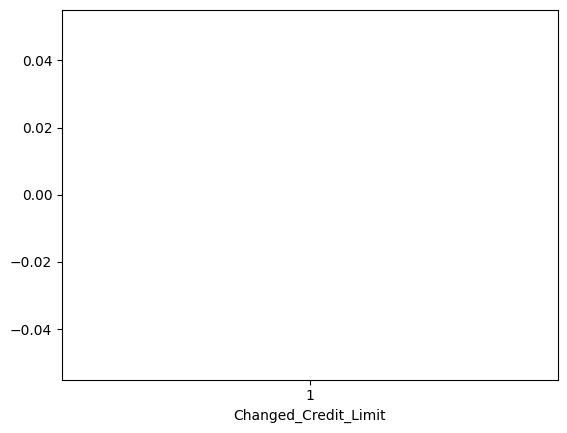

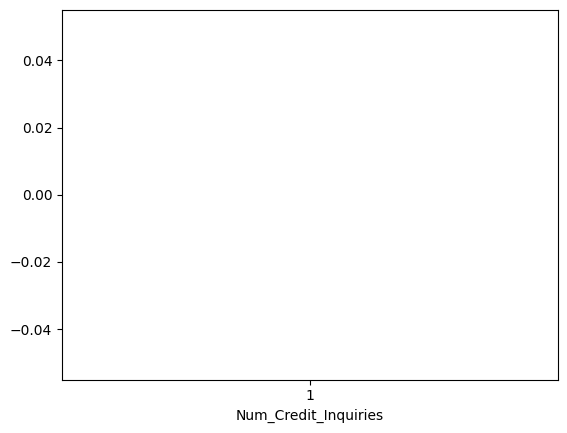

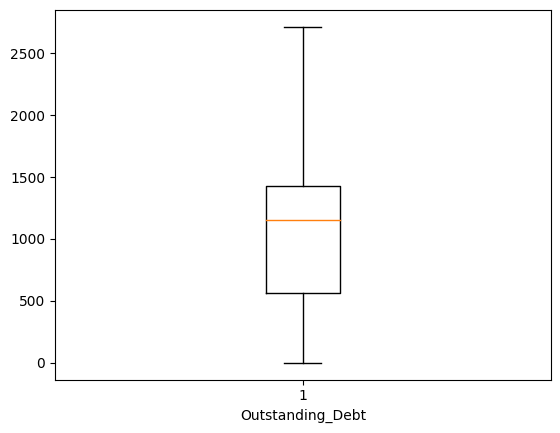

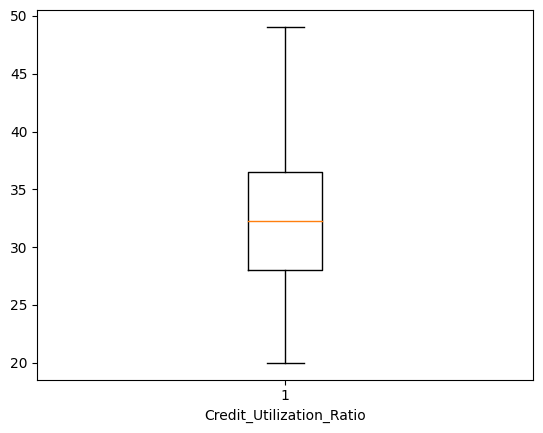

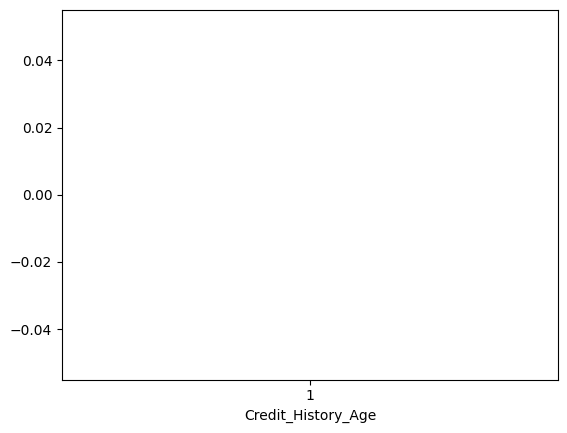

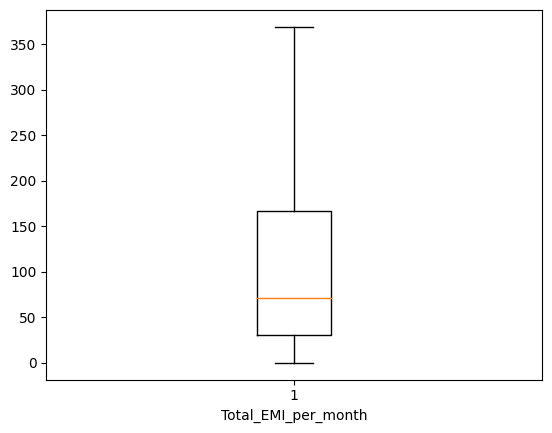

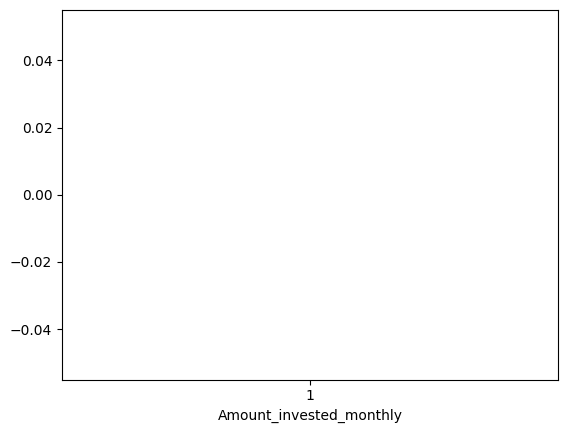

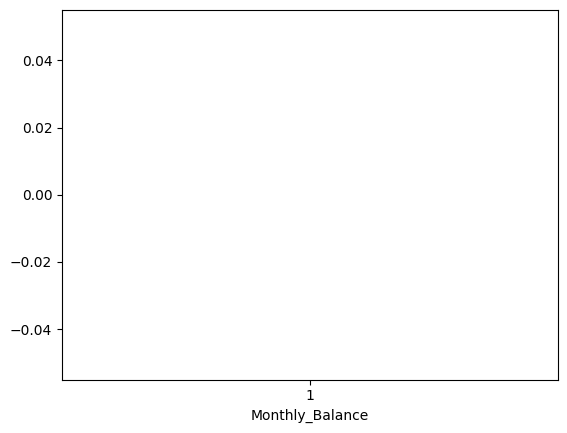

In [181]:
for i in numeric_col:
    plt.boxplot(df_copy[i])
    plt.xlabel(i)
    plt.show()

In [182]:
df_copy.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                        15000
Age                             0
SSN                          8400
Occupation                  10500
Annual_Income                   0
Monthly_Inhand_Salary       22500
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                17112
Delay_from_due_date             0
Num_of_Delayed_Payment      10500
Changed_Credit_Limit         3150
Num_Credit_Inquiries         3000
Credit_Mix                  30000
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age          13500
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      6750
Payment_Behaviour           11400
Monthly_Balance              1762
Credit_Score                50000
dtype: int64

In [183]:
for i in numeric_col:
    df_copy[i] = df_copy[i].fillna(df_copy[i].mean())

In [184]:
df_copy.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                        15000
Age                             0
SSN                             0
Occupation                  10500
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                17112
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Credit_Mix                  30000
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age              0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly         0
Payment_Behaviour           11400
Monthly_Balance                 0
Credit_Score                50000
dtype: int64

## Fill cột object

In [185]:
object_col = ['Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_Behaviour']

In [186]:
for i in object_col:
    df_copy[i] = df_copy[i].fillna(df_copy[i].mode(dropna=True)[0])

In [187]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        150000 non-null  int64  
 1   Customer_ID               150000 non-null  int64  
 2   Month                     150000 non-null  int64  
 3   Name                      135000 non-null  object 
 4   Age                       150000 non-null  float64
 5   SSN                       150000 non-null  float64
 6   Occupation                150000 non-null  object 
 7   Annual_Income             150000 non-null  float64
 8   Monthly_Inhand_Salary     150000 non-null  float64
 9   Num_Bank_Accounts         150000 non-null  float64
 10  Num_Credit_Card           150000 non-null  float64
 11  Interest_Rate             150000 non-null  float64
 12  Num_of_Loan               150000 non-null  float64
 13  Type_of_Loan              150000 non-null  o

## Xử lý các trường hợp không hợp lý và thay thế bằng mean, median

In [188]:
df_copy[df_copy['Num_Bank_Accounts']<0]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
30330,51128,20266,3,Margaretf,39.0,8.070354e+08,Engineer,45306.285054,10434.146667,-1.0,...,Good,1151.70,40.586736,269.000000,No,196.587321,230.922386,High_spent_Large_value_payments,-220088.355122,Standard
30331,51129,20266,4,Margaretf,40.0,5.005493e+08,Engineer,45306.285054,3763.815873,-1.0,...,Good,1151.70,39.369401,270.000000,No,196.587321,160.767054,Low_spent_Large_value_payments,592.522928,Good
30332,51130,20266,5,Margaretf,40.0,8.070354e+08,Engineer,45306.285054,10434.146667,-1.0,...,Good,1151.70,28.702053,271.000000,No,196.587321,150.096675,High_spent_Large_value_payments,-220088.355122,Good
30333,51131,20266,6,Margaretf,40.0,8.070354e+08,Engineer,45306.285054,10434.146667,-1.0,...,Good,1151.70,34.808390,272.000000,No,196.587321,206.427739,Low_spent_Medium_value_payments,120.129276,Good
30334,51132,20266,7,Margaretf,40.0,8.070354e+08,Engineer,45306.285054,10434.146667,-1.0,...,Good,1151.70,35.206427,223.215326,No,187.601652,172.992021,High_spent_Large_value_payments,-220088.355122,Good
30335,51133,20266,8,Margaretf,40.0,8.070354e+08,Engineer,51816.676799,3763.815873,-1.0,...,Standard,1151.70,38.278518,274.000000,No,196.587321,338.672303,High_spent_Medium_value_payments,-220088.355122,Good
43689,71167,43128,2,Douwe Miedemaz,54.0,3.005446e+08,Engineer,117851.070000,9870.922500,-1.0,...,Good,607.78,37.286105,246.000000,No,0.000000,206.427739,Low_spent_Small_value_payments,588.947796,Poor
43690,71168,43128,3,Douwe Miedemaz,54.0,3.005446e+08,Engineer,117851.070000,9870.922500,-1.0,...,Good,607.78,41.915627,247.000000,No,0.000000,142.319789,High_spent_Large_value_payments,-220088.355122,Poor
43691,71169,43128,4,Douwe Miedemaz,54.0,3.005446e+08,Engineer,117851.070000,9870.922500,-1.0,...,Good,607.78,41.799942,248.000000,No,0.000000,160.767054,High_spent_Small_value_payments,-220088.355122,Poor
43692,71170,43128,5,Douwe Miedemaz,54.0,3.005446e+08,Engineer,117851.070000,9870.922500,-1.0,...,Good,607.78,46.244581,249.000000,No,0.000000,145.581578,High_spent_Large_value_payments,-220088.355122,Poor


In [189]:
df_copy[df_copy['Num_Bank_Accounts']<0]['Customer_ID'].unique()

array([20266, 43128, 17340, 22931], dtype=int64)

In [190]:
df_copy[df_copy['Customer_ID']==22931]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
55632,89082,22931,1,Stephensonq,35.631486,120482348.0,Developer,30352.11,2317.342500,0.0,...,Good,644.57,37.488977,281.000000,No,16.483566,187.641645,Low_spent_Small_value_payments,317.609039,Standard
55633,89083,22931,2,Stephensonq,40.000000,120482348.0,Developer,30352.11,2317.342500,0.0,...,Good,644.57,30.230648,223.215326,No,16.483566,143.322972,High_spent_Small_value_payments,331.927711,Standard
55634,89084,22931,3,Stephensonq,40.000000,120482348.0,Developer,30352.11,3763.815873,0.0,...,Standard,644.57,38.822428,283.000000,No,16.483566,60.681956,High_spent_Small_value_payments,414.568728,Standard
55635,89085,22931,4,Stephensonq,40.000000,120482348.0,Developer,30352.11,2317.342500,0.0,...,Good,644.57,36.351893,284.000000,NM,16.483566,54.569799,High_spent_Large_value_payments,400.680884,Standard
55636,89086,22931,5,Stephensonq,40.000000,120482348.0,Developer,30352.11,2317.342500,-1.0,...,Good,644.57,25.532001,285.000000,NM,16.483566,126.665345,Low_spent_Medium_value_payments,368.585338,Standard
55637,89087,22931,6,NaN,40.000000,120482348.0,Developer,30352.11,2317.342500,-1.0,...,Good,644.57,31.813259,286.000000,No,16.483566,54.821327,High_spent_Large_value_payments,400.429357,Standard
55638,89088,22931,7,Stephensonq,41.000000,120482348.0,Developer,30352.11,2317.342500,-1.0,...,Good,644.57,26.574175,287.000000,No,16.483566,64.860838,Low_spent_Small_value_payments,400.389846,Standard
55639,89089,22931,8,NaN,41.000000,120482348.0,Developer,30352.11,2317.342500,-1.0,...,Good,644.57,32.937399,288.000000,No,16.483566,89.622962,High_spent_Medium_value_payments,375.627721,Standard
127816,89090,22931,9,Stephensonq,41.000000,120482348.0,Developer,30352.11,2317.342500,-1.0,...,Standard,644.57,32.468370,289.000000,No,16.483566,291.127877,Low_spent_Small_value_payments,214.122807,NaN
127817,89091,22931,10,Stephensonq,41.000000,120482348.0,Developer,30352.11,2317.342500,-1.0,...,Good,644.57,36.605320,290.000000,NM,16.483566,75.160896,High_spent_Medium_value_payments,390.089788,NaN


In [191]:
df_copy.loc[df_copy['Num_Bank_Accounts']<0, 'Num_Bank_Accounts'] = 0

In [192]:
df_copy[df_copy['Delay_from_due_date']<0]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
1,5635,3392,2,Aaron Maashoh,23.000000,821000265.0,Scientist,19114.120000,3763.815873,3.0,...,Good,809.98,31.944960,223.215326,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
49,5707,10314,2,Nadiaq,34.000000,411510676.0,Lawyer,45940.393578,3854.427544,0.0,...,Good,352.16,31.983710,368.000000,No,137.644605,206.427739,High_spent_Small_value_payments,547.760457,Good
74,5744,47624,3,Jamesj,44.000000,366681681.0,Journalist,31370.800000,2825.233333,1.0,...,Good,421.43,31.046418,319.000000,No,46.616129,140.820696,Low_spent_Medium_value_payments,375.086508,Good
78,5748,47624,7,Jamesj,45.000000,366681681.0,Journalist,31370.800000,2825.233333,1.0,...,Good,421.43,22.762202,323.000000,No,46.616129,188.394900,Low_spent_Small_value_payments,337.512304,Good
79,5749,47624,8,Jamesj,45.000000,366681681.0,Journalist,31370.800000,3763.815873,1.0,...,Standard,421.43,37.565053,324.000000,No,46.616129,252.644827,Low_spent_Small_value_payments,273.262377,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149220,153302,15772,9,Sybille dee,50.000000,619818130.0,Musician,19809.270000,1711.772500,5.0,...,Good,562.34,31.137318,365.000000,No,14.058627,92.237679,High_spent_Small_value_payments,324.880943,NaN
149287,153497,23286,12,Maril,26.000000,15208263.0,Accountant,51816.676799,3763.815873,3.0,...,Standard,1394.91,38.054845,208.000000,No,156.988147,206.427739,Low_spent_Medium_value_payments,464.721903,NaN
149321,153603,4164,10,NaN,35.631486,261184430.0,Entrepreneur,33441.590000,2748.799167,2.0,...,Good,154.96,29.891189,385.000000,No,0.000000,371.450586,Low_spent_Small_value_payments,193.429331,NaN
149687,154697,5692,12,Julien Toyera,32.000000,534127952.0,Media_Manager,61465.780000,5082.148333,2.0,...,Good,608.87,30.327814,225.000000,No,31.650737,196.389540,High_spent_Small_value_payments,540.174557,NaN


In [193]:
df_copy[df_copy['Delay_from_due_date']<0]['Customer_ID'].unique()

array([ 3392, 10314, 47624, 49323, 29152,  8970,  6806, 50592, 39249,
       37013, 10251, 35602, 21293, 25414, 33107,  7486,  8086, 34447,
       16606, 34429, 46990, 46716,  1345, 23479, 47754, 34344, 18364,
       48117, 26588, 13075, 37628,  6099, 25714, 35593, 11139,  9918,
       34581, 11176,  3111, 50221, 24967,  2341, 39348, 31884, 43042,
       45474, 45380, 17203, 38196, 20457, 39199,  5636, 48972, 34701,
       29149, 47242, 41376, 49612, 27608, 18007, 34215, 39945, 35520,
       45442, 25254,  1933, 46251, 30833,  7980, 14398, 42740, 20552,
       14909,  7702, 31516, 33829, 49400, 24126, 10147,  2738,  8668,
       38566, 38293, 44761, 30315, 21183,  9085, 23713, 49882, 12828,
        7344,  5703, 31079, 29088, 28707, 22029, 28014, 42133, 30982,
       26811,  2227,  6345, 17242, 41487,  1645, 36766, 38938, 42510,
       50037, 31866, 14850, 19248, 18498, 21096, 20132, 47316, 11167,
       49593, 44503, 43834, 43059, 18461, 13949, 22966, 35079, 10548,
       44315,  8292,

In [194]:
df_copy[df_copy['Customer_ID']==48234].iloc[:,0:15]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date
93536,145938,48234,1,Andreasz,51.0,669332894.0,Media_Manager,51816.676799,4190.115139,2.0,4.0,12.0,0.0,not specified,2.0
93537,145939,48234,2,Andreasz,51.0,669332894.0,Media_Manager,51816.676799,4190.115139,2.0,4.0,12.0,0.0,not specified,2.0
93538,145940,48234,3,Andreasz,51.0,669332894.0,Media_Manager,51816.676799,4190.115139,2.0,4.0,12.0,0.0,not specified,2.0
93539,145941,48234,4,Andreasz,51.0,669332894.0,Media_Manager,51816.676799,4190.115139,2.0,4.0,12.0,0.0,not specified,2.0
93540,145942,48234,5,Andreasz,51.0,669332894.0,Media_Manager,51816.676799,4190.115139,2.0,4.0,12.0,0.0,not specified,2.0
93541,145943,48234,6,Andreasz,51.0,669332894.0,Media_Manager,51816.676799,4190.115139,2.0,4.0,12.0,0.0,not specified,-2.0
93542,145944,48234,7,Andreasz,51.0,669332894.0,Media_Manager,51816.676799,4190.115139,2.0,4.0,12.0,0.0,not specified,2.0
93543,145945,48234,8,Andreasz,52.0,669332894.0,Media_Manager,51816.676799,4190.115139,2.0,4.0,12.0,0.0,not specified,-2.0
146768,145946,48234,9,Andreasz,52.0,669332894.0,Media_Manager,51816.676799,4190.115139,2.0,4.0,12.0,0.0,not specified,2.0
146769,145947,48234,10,Andreasz,52.0,669332894.0,Media_Manager,51816.676799,4190.115139,2.0,4.0,12.0,0.0,not specified,2.0


In [195]:
df_copy.loc[df_copy['Delay_from_due_date']<0, 'Delay_from_due_date'] = None

In [196]:
df_copy[df_copy['Num_of_Delayed_Payment']<0]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
10,5648,8625,3,Rick Rothackerj,28.000000,4075839.0,Teacher,34847.840000,3037.986667,2.0,...,Standard,605.03,33.224951,321.0,No,18.816215,58.515976,High_spent_Large_value_payments,466.466476,Standard
698,6680,29152,3,Aruna Viswanathau,28.000000,330960638.0,Mechanic,15398.950000,3763.815873,1.0,...,Good,343.84,33.494442,341.0,NM,34.813970,47.607470,High_spent_Medium_value_payments,322.403143,Standard
1253,7511,12757,6,Mutikanit,49.000000,325078725.0,Doctor,51816.676799,3763.815873,0.0,...,Good,1287.59,30.801079,307.0,NM,0.000000,97.705452,Low_spent_Small_value_payments,319.668590,Standard
1561,7975,45940,2,enu,35.631486,946089738.0,Architect,30922.280000,2494.856667,1.0,...,Good,957.53,39.135924,256.0,No,30.338204,159.523585,Low_spent_Large_value_payments,329.623877,Poor
2167,8881,10251,8,orv,27.000000,434178443.0,Accountant,34841.870000,3025.489167,1.0,...,Standard,142.05,38.351183,374.0,No,33.366098,174.874086,Low_spent_Medium_value_payments,374.308732,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148376,150770,18905,9,Emmottr,29.000000,558068197.0,Developer,19170.730000,1315.560833,3.0,...,Good,318.94,35.265636,245.0,No,58.048072,88.426873,Low_spent_Large_value_payments,255.081138,NaN
149243,153365,12580,12,Philz,54.000000,921270890.0,Journalist,43502.680000,3733.223333,0.0,...,Standard,862.14,28.283294,318.0,No,32.032328,160.767054,Low_spent_Small_value_payments,127.714435,NaN
149285,153495,23286,10,Maril,26.000000,15208263.0,Accountant,123915.990000,10336.332500,3.0,...,Good,1394.91,36.333194,206.0,NM,156.988147,260.694372,High_spent_Large_value_payments,-220088.355122,NaN
149288,153506,40156,9,Mostafavin,24.000000,187132907.0,Scientist,16937.425000,1162.452083,4.0,...,Good,167.57,27.203021,265.0,No,7.247943,100.919000,Low_spent_Medium_value_payments,288.078266,NaN


In [197]:
df_copy[df_copy['Num_of_Delayed_Payment']<0]['Customer_ID'].unique()

array([ 8625, 29152, 12757, 45940, 10251,  3333,  3929, 21293,  4426,
       25414, 16167, 43066, 21322, 10123, 35188, 26218, 26418, 28910,
       32265, 11773, 47754, 49199, 14290, 20016, 19075, 49507, 13075,
       48148, 45080,  4477, 37628, 35058, 19758, 17488, 11148, 25321,
       13654, 36050, 33615,  9918, 11176,  4829, 48209, 34440, 44404,
       47715, 10269, 39909, 26631, 31123, 39182, 13666,  9624, 48972,
        3559, 34701, 15614, 47448, 19145, 25434, 33042,  1604, 48331,
       11426, 13888, 41376, 48578, 44043,  5136, 27608,  2221, 29037,
       35859, 18007, 45442, 48633, 16890, 43386, 23420, 25655,  2170,
        4483,  5754, 32772,  8778,  3626, 26972,  8668, 15729, 37190,
       10351, 17846, 38293, 20868, 30410, 50983,  5893, 11542, 45048,
       21518, 35124, 29088, 22029, 45052, 46467, 39733, 21719, 11988,
       44699, 42964, 37741, 36766, 13582, 39656, 31866, 16818, 23184,
        5843, 50902, 20553, 35440, 44118, 21037, 32270, 44792, 44787,
       24955, 43895,

In [198]:
df_copy[df_copy['Customer_ID']==8625].iloc[:,0:20]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt
8,5646,8625,1,Rick Rothackerj,28.0,4.075839e+06,Lawyer,34847.84,3037.986667,2.0,4.000000,6.0,1.0,credit-builder loan,3.0,4.000000,5.42,2.0,Good,605.03
9,5647,8625,2,Rick Rothackerj,28.0,4.075839e+06,Teacher,34847.84,3037.986667,2.0,4.000000,6.0,1.0,credit-builder loan,7.0,1.000000,7.42,2.0,Good,605.03
10,5648,8625,3,Rick Rothackerj,28.0,4.075839e+06,Teacher,34847.84,3037.986667,2.0,5.926173,6.0,1.0,credit-builder loan,3.0,-1.000000,5.42,2.0,Standard,605.03
11,5649,8625,4,Rick Rothackerj,28.0,4.075839e+06,Teacher,34847.84,3763.815873,2.0,4.000000,6.0,1.0,credit-builder loan,3.0,3.000000,5.42,2.0,Good,605.03
12,5650,8625,5,Rick Rothackerj,28.0,4.075839e+06,Teacher,34847.84,3037.986667,2.0,4.000000,6.0,1.0,credit-builder loan,3.0,1.000000,6.42,2.0,Good,605.03
13,5651,8625,6,Rick Rothackerj,28.0,4.075839e+06,Teacher,34847.84,3037.986667,2.0,4.000000,6.0,1.0,credit-builder loan,3.0,0.000000,5.42,2.0,Good,605.03
14,5652,8625,7,Rick Rothackerj,28.0,4.075839e+06,Teacher,34847.84,3763.815873,2.0,4.000000,6.0,1.0,credit-builder loan,3.0,4.000000,5.42,2.0,Good,605.03
15,5653,8625,8,Rick Rothackerj,28.0,4.075839e+06,Teacher,34847.84,3037.986667,2.0,4.000000,6.0,1.0,credit-builder loan,3.0,4.000000,5.42,2.0,Good,605.03
100004,5654,8625,9,Rick Rothackerj,28.0,4.075839e+06,Lawyer,34847.84,3037.986667,2.0,4.000000,6.0,1.0,credit-builder loan,3.0,1.000000,5.42,5.0,Good,605.03
100005,5655,8625,10,Rick Rothackerj,28.0,5.005493e+08,Teacher,34847.84,3037.986667,2.0,4.000000,6.0,1.0,credit-builder loan,3.0,3.000000,5.42,5.0,Good,605.03


In [199]:
df_copy.loc[df_copy['Num_of_Delayed_Payment']<0, 'Num_of_Delayed_Payment'] = None

In [200]:
df_copy[df_copy['Monthly_Balance']<0]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
16,5658,11708,1,Langep,34.0,4.868540e+08,Lawyer,48450.287068,3996.935535,1.0,...,Good,1303.01,28.616735,213.0,No,246.992319,168.413703,Low_spent_Small_value_payments,-220088.355122,Good
17,5659,11708,2,NaN,34.0,4.868540e+08,Engineer,48450.287068,3996.935535,1.0,...,Good,1303.01,41.702573,214.0,No,246.992319,232.860384,High_spent_Small_value_payments,-220088.355122,Good
18,5660,11708,3,Langep,34.0,4.868540e+08,Lawyer,48450.287068,3763.815873,1.0,...,Good,1303.01,26.519815,215.0,No,246.992319,206.427739,High_spent_Small_value_payments,-220088.355122,Good
20,5662,11708,5,Langep,34.0,4.868540e+08,Lawyer,48450.287068,3996.935535,1.0,...,Good,1303.01,31.376150,217.0,No,246.992319,160.767054,Low_spent_Large_value_payments,-220088.355122,Good
21,5663,11708,6,Langep,34.0,4.868540e+08,Engineer,48450.287068,3996.935535,1.0,...,Good,1303.01,39.783993,218.0,No,246.992319,257.808099,High_spent_Medium_value_payments,-220088.355122,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149952,155498,41043,9,t Astridn,39.0,9.481586e+07,Writer,87695.340000,7337.945000,2.0,...,Good,361.68,37.329252,237.0,No,0.000000,206.427739,Low_spent_Small_value_payments,-220088.355122,NaN
149954,155500,41043,11,t Astridn,40.0,9.481586e+07,Writer,87695.340000,7337.945000,2.0,...,Good,361.68,36.104479,239.0,No,0.000000,297.972852,High_spent_Small_value_payments,-220088.355122,NaN
149955,155501,41043,12,t Astridn,40.0,5.005493e+08,Writer,87695.340000,7337.945000,2.0,...,Good,361.68,30.059746,240.0,No,0.000000,200.772703,High_spent_Medium_value_payments,-220088.355122,NaN
149962,155524,9812,11,enj,38.0,6.476789e+08,Media_Manager,47348.382276,3921.715941,3.0,...,Standard,365.66,32.853894,365.0,Yes,187.601652,141.826583,High_spent_Large_value_payments,-220088.355122,NaN


In [201]:
df_copy.loc[df_copy['Monthly_Balance']<0, 'Monthly_Balance'] = None

In [202]:
df[df['Amount_invested_monthly']>=10000]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
18,5660,11708,3,Langep,34,486853974.0,NaN,143162.64,NaN,1,...,Good,1303.01,26.519815,215.0,No,246.992319,10000.0,High_spent_Small_value_payments,715.741367,Good
23,5665,11708,8,Langep,34,486853974.0,Engineer,143162.64,12187.220000,1,...,Good,1303.01,38.374753,220.0,No,246.992319,10000.0,High_spent_Small_value_payments,895.494583,Standard
28,5674,47249,5,Jasond,55,72316145.0,Entrepreneur,30689.89,2612.490833,2,...,Good,632.46,41.154317,211.0,No,16.415452,10000.0,Low_spent_Large_value_payments,359.374916,Standard
121,5815,13266,2,Chalmersa,30,965462491.0,Scientist,31993.78,2942.148333,6,...,Standard,818.22,37.958569,203.0,Yes,45.141298,10000.0,Low_spent_Small_value_payments,157.869804,Standard
142,5844,4059,7,Patrickg,46,928914452.0,Teacher,32284.62,2898.385000,6,...,Standard,1283.37,24.205533,83.0,Yes,103.037560,10000.0,Low_spent_Small_value_payments,85.902095,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149942,155464,18426,11,Yantoultra Nguif,32,291517240.0,Mechanic,64511.34,5440.945000,7,...,Standard,330.60,31.083920,NaN,Yes,0.000000,10000.0,High_spent_Large_value_payments,658.261080,NaN
149945,155475,35242,10,Kwokw,39,18637005.0,Manager,85744.12,7125.343333,6,...,Standard,717.79,39.847437,192.0,Yes,72.099176,10000.0,Low_spent_Small_value_payments,421.112538,NaN
149952,155498,41043,9,t Astridn,39,94815856.0,Writer,87695.34,7337.945000,2,...,Good,361.68,37.329252,237.0,No,0.000000,10000.0,NaN,859.006805,NaN
149989,155607,44897,10,Chris Wickhamm,50,133167738.0,Writer,37188.10,3097.008333,1,...,Good,620.64,23.986021,366.0,No,84.205949,10000.0,Low_spent_Large_value_payments,270.754039,NaN


In [203]:
df_copy.loc[df_copy['Amount_invested_monthly']>=10000, 'Amount_invested_monthly'] = None

<Axes: >

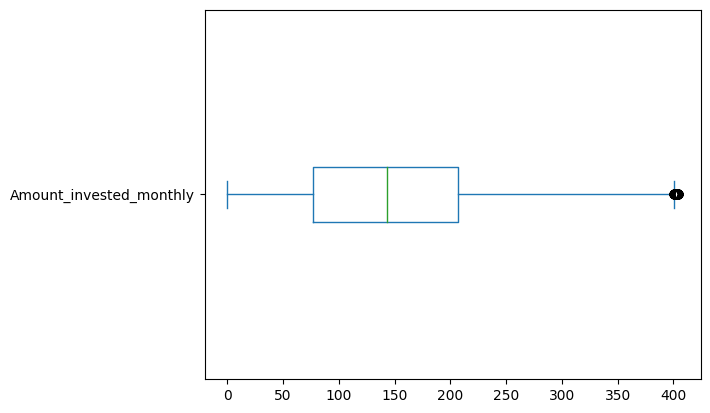

In [204]:
df_copy['Amount_invested_monthly'].plot(kind='box', vert=0)

In [205]:
df_copy.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                        15000
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                    0
Delay_from_due_date           889
Num_of_Delayed_Payment        931
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age              0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly         0
Payment_Behaviour               0
Monthly_Balance             23182
Credit_Score                50000
dtype: int64

In [206]:
temp = ['Delay_from_due_date','Num_of_Delayed_Payment','Monthly_Balance']
for i in temp:
    df_copy[i] = df_copy[i].fillna(df_copy[i].mean())

In [207]:
df_copy.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                        15000
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                    0
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age              0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly         0
Payment_Behaviour               0
Monthly_Balance                 0
Credit_Score                50000
dtype: int64

In [208]:
df_copy[df_copy['Credit_Score'].notna()].info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  object 

### output clean train,text file

In [209]:
df_copy[df_copy['Credit_Score'].notna()].to_csv("clean_train.csv", index=False)

In [210]:
df_copy[df_copy['Credit_Score'].isna()].info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 100000 to 149999
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50000 non-null  int64  
 1   Customer_ID               50000 non-null  int64  
 2   Month                     50000 non-null  int64  
 3   Name                      44985 non-null  object 
 4   Age                       50000 non-null  float64
 5   SSN                       50000 non-null  float64
 6   Occupation                50000 non-null  object 
 7   Annual_Income             50000 non-null  float64
 8   Monthly_Inhand_Salary     50000 non-null  float64
 9   Num_Bank_Accounts         50000 non-null  float64
 10  Num_Credit_Card           50000 non-null  float64
 11  Interest_Rate             50000 non-null  float64
 12  Num_of_Loan               50000 non-null  float64
 13  Type_of_Loan              50000 non-null  object 
 14  Delay

In [211]:
df_copy[df_copy['Credit_Score'].isna()].drop(columns='Credit_Score').to_csv("clean_test.csv", index=False)

In [212]:
df = df_copy.copy()

In [213]:
df.drop(columns=['ID', 'Customer_ID', 'Month', 'Name', 'SSN'],inplace=True)

In [214]:
df

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.000000,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",3.000000,...,Standard,809.980000,26.822620,265.000000,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,23.000000,Scientist,19114.12,3763.815873,3.0,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",18.143328,...,Good,809.980000,31.944960,223.215326,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,35.631486,Scientist,19114.12,3763.815873,3.0,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",3.000000,...,Good,809.980000,28.609352,267.000000,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,23.000000,Scientist,19114.12,3763.815873,3.0,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",5.000000,...,Good,809.980000,31.377862,268.000000,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,23.000000,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",6.000000,...,Good,809.980000,24.797347,269.000000,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,35.631486,Architect,20002.88,1929.906667,10.0,8.0,29.0,5.0,"personal loan,auto loan,mortgage loan,student ...",33.000000,...,Standard,1263.337414,34.780553,223.215326,Yes,60.964772,146.486325,Low_spent_Small_value_payments,275.539570,NaN
149996,25.000000,Mechanic,39628.99,3763.815873,4.0,6.0,7.0,2.0,"auto loan,student loan",20.000000,...,Good,502.380000,27.758522,383.000000,NM,35.104023,181.442999,Low_spent_Small_value_payments,409.394562,NaN
149997,25.000000,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,"auto loan,student loan",23.000000,...,Good,502.380000,36.858542,384.000000,No,35.104023,206.427739,Low_spent_Large_value_payments,349.726332,NaN
149998,25.000000,Mechanic,39628.99,3763.815873,4.0,6.0,7.0,2.0,"auto loan,student loan",21.000000,...,Good,502.380000,39.139840,385.000000,No,35.104023,97.598580,High_spent_Small_value_payments,463.238981,NaN


### Xử lý biến dummies và các cột catagory

In [244]:
from sklearn.base import BaseEstimator, TransformerMixin

class GetDummies(BaseEstimator, TransformerMixin): 
    def __init__(self, data_sep=',', col_name_sep='_'):
        """
        Transformer that creates dummy variables from categorical columns with a separator.
        Parameters:
            - data_sep (str): Separator used to split categorical values into multiple dummy variables.
            - col_name_sep (str): Separator used to separate the column name from the prefix in the output column names.
        """
        self.data_sep     = data_sep
        self.col_name_sep = col_name_sep
        
    # Return self nothing else to do here
    def fit(self, X, y  = None): 
        """
        Fit the transformer to the data.
        Parameters:
            - X (pandas.DataFrame): Input data with categorical columns.
            - y (array-like): Target variable (ignored).
        Returns:
            - self: Returns the transformer object.
        """
        object_cols       = X.select_dtypes(include="object").columns
        self.dummy_cols   = [col for col in object_cols if X[col].str.contains(self.data_sep, regex=True).any()]
        self.dummy_prefix = [''.join(map(lambda x: x[0], col.split(self.col_name_sep)))  if self.col_name_sep in col else col[:2]   for col in self.dummy_cols]
        
        for col, pre in zip(self.dummy_cols, self.dummy_prefix):
            dummy_X = X.join(X[col].str.get_dummies(sep=self.data_sep).add_prefix(pre+self.col_name_sep))            
            
        dummy_X.drop(columns = self.dummy_cols, inplace=True)
        self.columns = dummy_X.columns
        return self
    
    # Transformer method we wrote for this transformer
    def transform(self, X, y = None):
        """
        Transform the input data by creating dummy variables.
        Parameters:
            - X (pandas.DataFrame): Input data with categorical columns.
            - y (array-like): Target variable (ignored).
        Returns:
            - X_transformed (pandas.DataFrame): Transformed data with dummy variables.
        """
        for col, pre in zip(self.dummy_cols, self.dummy_prefix):
            X_transformed = X.join(X[col].str.get_dummies(sep=self.data_sep).add_prefix(pre+self.col_name_sep))   

        X_transformed = X_transformed.reindex(columns=self.columns, fill_value=0)          
        return X_transformed
        
    # to get feature names    
    def get_feature_names_out(self, input_features=None):
        """
        Get the names of the transformed features.
        Parameters:
            - input_features (array-like): Names of the input features (ignored).
        Returns:
            - output_features (list): Names of the transformed features.
        """
        return self.columns.tolist()

In [245]:
df["Credit_Score"].value_counts(normalize=True).sort_index()

Credit_Score
Good        0.17828
Poor        0.28998
Standard    0.53174
Name: proportion, dtype: float64

In [247]:
dummy = GetDummies()
df_new = dummy.fit_transform(df)

In [255]:
final_obj = df_new.select_dtypes(include='O').columns.to_list()
final_obj

['Occupation',
 'Credit_Mix',
 'Payment_of_Min_Amount',
 'Payment_Behaviour',
 'Credit_Score']

In [257]:
df_new[final_obj]

,Occupation,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
0,Scientist,Standard,No,High_spent_Small_value_payments,Good
1,Scientist,Good,No,Low_spent_Large_value_payments,Good
2,Scientist,Good,No,Low_spent_Medium_value_payments,Good
3,Scientist,Good,No,Low_spent_Small_value_payments,Good
4,Scientist,Good,No,High_spent_Medium_value_payments,Good
...,...,...,...,...,...
149995,Architect,Standard,Yes,Low_spent_Small_value_payments,NaN
149996,Mechanic,Good,NM,Low_spent_Small_value_payments,NaN
149997,Mechanic,Good,No,Low_spent_Large_value_payments,NaN
149998,Mechanic,Good,No,High_spent_Small_value_payments,NaN


In [264]:
df_new.isna().sum()

Age                                0
Occupation                         0
Annual_Income                      0
Monthly_Inhand_Salary              0
Num_Bank_Accounts                  0
Num_Credit_Card                    0
Interest_Rate                      0
Num_of_Loan                        0
Delay_from_due_date                0
Num_of_Delayed_Payment             0
Changed_Credit_Limit               0
Num_Credit_Inquiries               0
Credit_Mix                         0
Outstanding_Debt                   0
Credit_Utilization_Ratio           0
Credit_History_Age                 0
Payment_of_Min_Amount              0
Total_EMI_per_month                0
Amount_invested_monthly            0
Payment_Behaviour                  0
Monthly_Balance                    0
Credit_Score                   50000
ToL_auto loan                      0
ToL_credit-builder loan            0
ToL_debt consolidation loan        0
ToL_home equity loan               0
ToL_mortgage loan                  0
T

In [276]:
from sklearn.preprocessing import OrdinalEncoder

ol = OrdinalEncoder(dtype='int')
df_new[final_obj] = ol.fit_transform(df[final_obj])

ValueError: There are missing values in features [4]. For OrdinalEncoder to encode missing values with dtype: int, set encoded_missing_value to a non-nan value, or set dtype to a float

<Axes: >

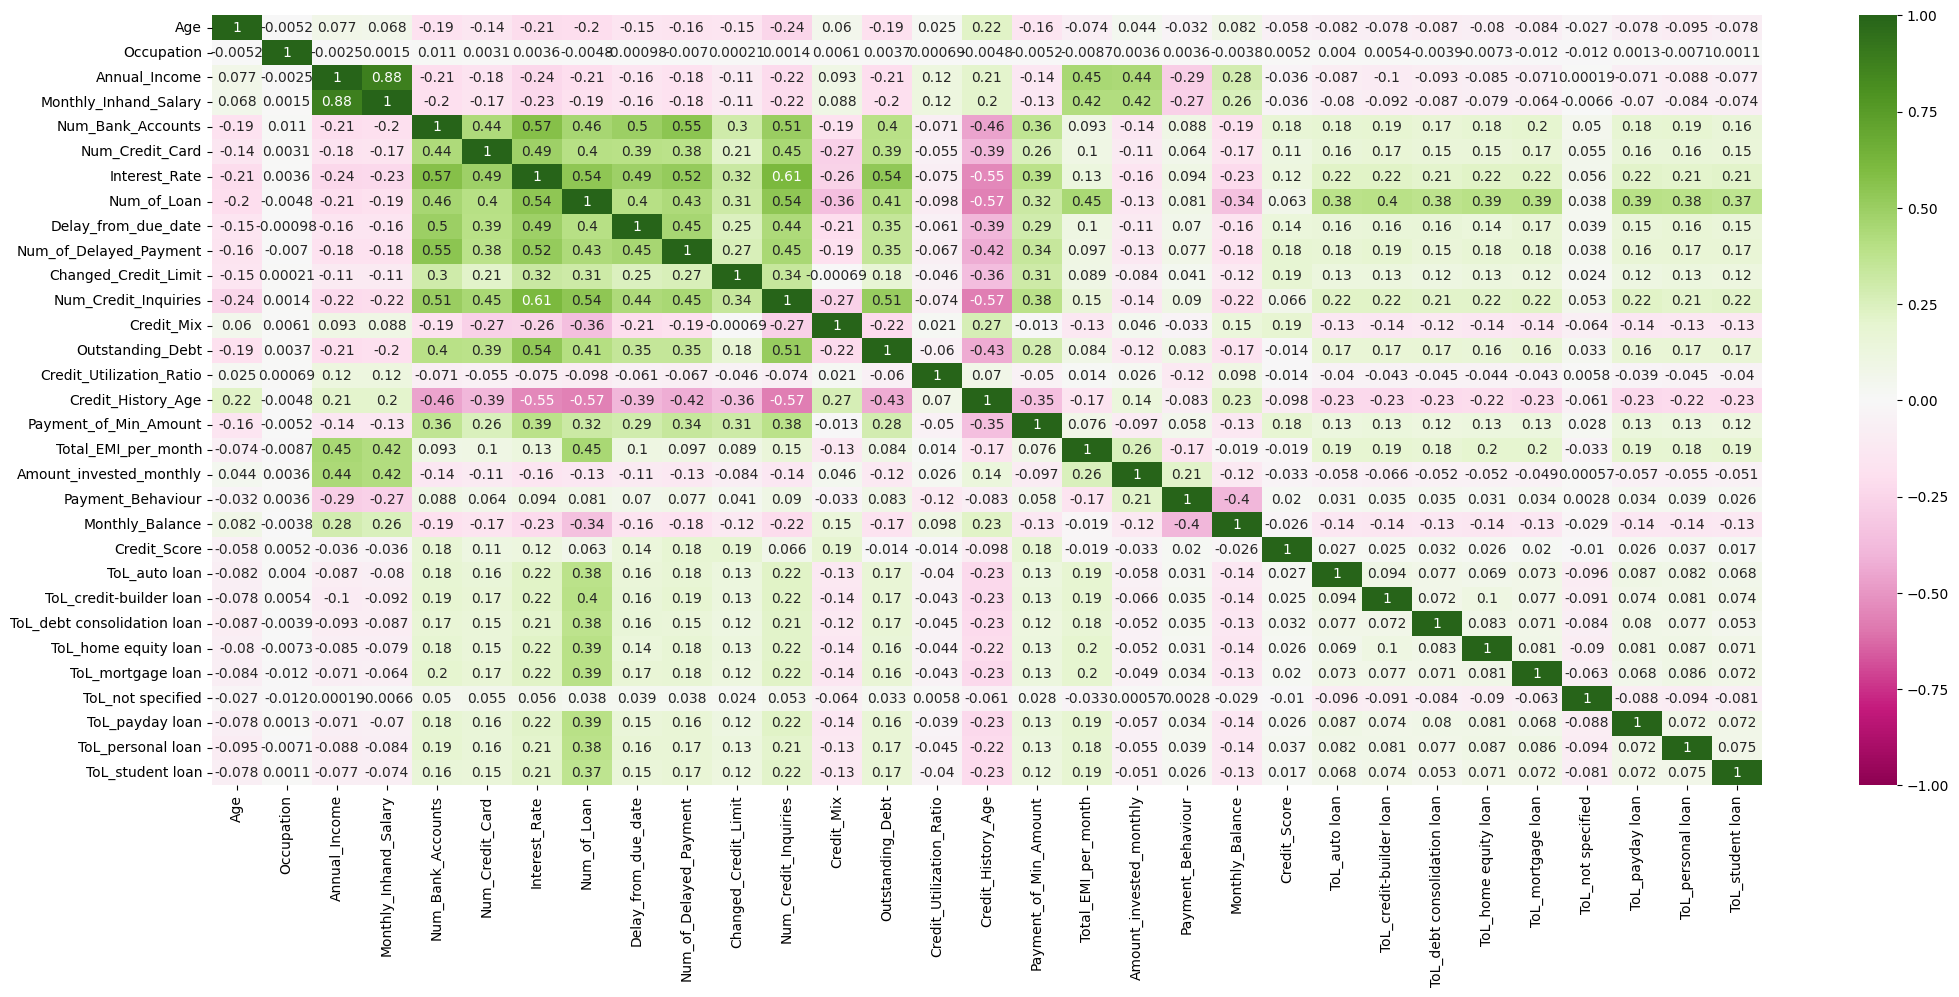

In [286]:
plt.figure(figsize=(25, 10))
sns.heatmap(
    df_new.corr(), 
    annot=True, vmin=-1, vmax=1, cmap="PiYG"
)

## Loại bỏ các feature không cần thiết

In [288]:
no_features = ['ToL_not specified','Occupation','Credit_Utilization_Ratio','Age']

In [289]:
alt_df = df_new.copy()
offical_df = alt_df.drop(no_features,axis=1)

In [216]:
df["Credit_Score"].value_counts(normalize=True).sort_index()

Credit_Score
Good        0.17828
Poor        0.28998
Standard    0.53174
Name: proportion, dtype: float64

In [291]:
x = offical_df.drop(columns="Credit_Score")
y = offical_df['Credit_Score']
df_test = pd.read_csv(r"C:\Users\Admin\Downloads\clean_test.csv")
df_test.drop(columns=['ID', 'Customer_ID', 'Month', 'Name', 'SSN'],inplace=True)
X_test = df_test

X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, 


((80000, 26), (80000,), (20000, 26), (20000,), (50000, 22))

In [293]:
df_test

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,23.000000,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",3.000000,...,6.660812,Good,809.980000,35.030402,273.000000,No,49.574949,236.642682,Low_spent_Small_value_payments,186.266702
1,24.000000,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",3.000000,...,4.000000,Good,809.980000,33.053114,274.000000,No,49.574949,21.465380,High_spent_Medium_value_payments,361.444004
2,24.000000,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",18.143328,...,4.000000,Good,809.980000,33.811894,223.215326,No,49.574949,148.233938,Low_spent_Medium_value_payments,264.675446
3,24.000000,Scientist,19114.12,3763.815873,3.0,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",4.000000,...,4.000000,Good,809.980000,32.430559,276.000000,No,49.574949,39.082511,High_spent_Medium_value_payments,343.826873
4,28.000000,Lawyer,34847.84,3037.986667,2.0,4.0,6.0,1.0,credit-builder loan,3.000000,...,5.000000,Good,605.030000,25.926822,327.000000,No,18.816215,39.684018,High_spent_Large_value_payments,485.298434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,35.631486,Architect,20002.88,1929.906667,10.0,8.0,29.0,5.0,"personal loan,auto loan,mortgage loan,student ...",33.000000,...,12.000000,Standard,1263.337414,34.780553,223.215326,Yes,60.964772,146.486325,Low_spent_Small_value_payments,275.539570
49996,25.000000,Mechanic,39628.99,3763.815873,4.0,6.0,7.0,2.0,"auto loan,student loan",20.000000,...,7.000000,Good,502.380000,27.758522,383.000000,NM,35.104023,181.442999,Low_spent_Small_value_payments,409.394562
49997,25.000000,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,"auto loan,student loan",23.000000,...,7.000000,Good,502.380000,36.858542,384.000000,No,35.104023,206.427739,Low_spent_Large_value_payments,349.726332
49998,25.000000,Mechanic,39628.99,3763.815873,4.0,6.0,7.0,2.0,"auto loan,student loan",21.000000,...,7.000000,Good,502.380000,39.139840,385.000000,No,35.104023,97.598580,High_spent_Small_value_payments,463.238981


In [294]:
df_test = dummy.fit_transform(df_test)

In [303]:
df_test[df_test.select_dtypes(include='O').columns.to_list()] = ol.fit_transform(df_test[df_test.select_dtypes(include='O').columns.to_list()])

### Scale data

In [307]:
scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_val_scaled = pd.DataFrame(scaler.fit_transform(X_val), columns=X_val.columns)

In [308]:
X_train_scaled

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,...,Payment_Behaviour,Monthly_Balance,ToL_auto loan,ToL_credit-builder loan,ToL_debt consolidation loan,ToL_home equity loan,ToL_mortgage loan,ToL_payday loan,ToL_personal loan,ToL_student loan
0,0.800762,0.788001,0.090909,0.272727,0.030303,0.222222,0.297872,0.194100,0.338353,0.235294,...,0.2,0.538008,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.898180,0.897981,0.454545,0.090909,0.272727,0.444444,0.255319,0.323500,0.375849,0.000000,...,0.0,0.538008,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
2,0.178959,0.178981,0.454545,0.636364,0.212121,0.333333,0.595745,0.258800,0.246236,0.235294,...,1.0,0.394521,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.130917,0.148675,0.636364,0.636364,0.242424,0.444444,0.340426,0.420550,0.523472,0.176471,...,0.6,0.474769,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0.118507,0.157011,0.181818,0.272727,0.242424,0.111111,0.042553,0.291150,0.485090,0.058824,...,0.2,0.587325,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,0.636747,0.619134,0.454545,0.454545,0.060606,0.333333,0.255319,0.291150,0.355477,0.058824,...,0.4,0.515432,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
79996,0.067145,0.107281,0.545455,0.909091,0.454545,0.222222,0.448157,0.517600,0.589607,0.369971,...,1.0,0.491686,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
79997,0.507743,0.523294,0.272727,0.545455,0.444414,0.444444,0.170213,0.323500,0.314438,0.235294,...,0.8,0.515978,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
79998,0.105171,0.153278,0.090909,0.636364,0.060606,0.333333,0.255319,0.291150,0.306761,0.117647,...,0.6,0.408397,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


### build model 

In [309]:
model_svm = SVC()
model_knn = KNeighborsClassifier()

In [313]:
best_svm = GridSearchCV(model_svm,param_grid={'C':[1,1.5,2,2.5,3,3.5,4,4.5,5,],
                                              'kernel':['linear','poly','rbf'],
                                              'degree': [3,4,5,6,7,8],
                                              'max_iter': [5,8],
                                              'decision_function_shape':['ovo','ovr']},cv=5,scoring='accuracy')
best_svm.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'degree': [3, 4, 5, 6, 7, 8],
                         'kernel': ['linear', 'poly', 'rbf'],
                         'max_iter': [5, 8]},
             scoring='accuracy')

In [315]:
model_svm = SVC(**best_svm.best_params_)
model_svm.fit(X_train_scaled,y_train)

SVC(C=2, decision_function_shape='ovo', degree=8, kernel='poly', max_iter=8)

In [316]:
svm_pred = model_svm.predict(X_val_scaled)
print(classification_report(y_pred=svm_pred,y_true=y_val))

              precision    recall  f1-score   support

         0.0       0.03      0.01      0.02      3527
         1.0       0.60      0.12      0.19      5874
         2.0       0.54      0.90      0.68     10599

    accuracy                           0.51     20000
   macro avg       0.39      0.34      0.30     20000
weighted avg       0.47      0.51      0.42     20000



<Axes: >

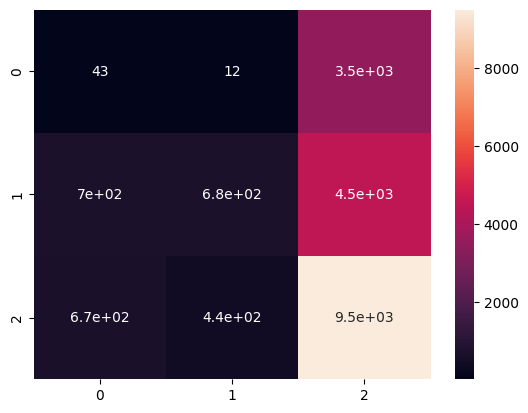

In [319]:
from sklearn.metrics import confusion_matrix


sns.heatmap(confusion_matrix(y_pred=svm_pred,y_true=y_val),annot=True)

In [320]:
model_knn.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [321]:
knn_pred = model_knn.predict(X_val_scaled)
print(classification_report(y_pred=knn_pred,y_true=y_val))

              precision    recall  f1-score   support

         0.0       0.60      0.62      0.61      3527
         1.0       0.71      0.71      0.71      5874
         2.0       0.75      0.74      0.75     10599

    accuracy                           0.71     20000
   macro avg       0.69      0.69      0.69     20000
weighted avg       0.71      0.71      0.71     20000



<Axes: >

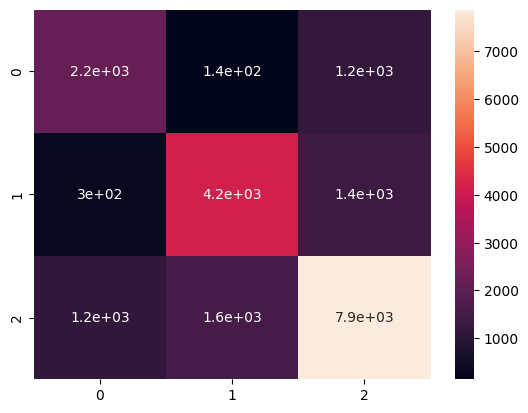

In [322]:
sns.heatmap(confusion_matrix(y_pred=knn_pred,y_true=y_val),annot=True)